[]
[]
[]
[]
[]
[]
[]


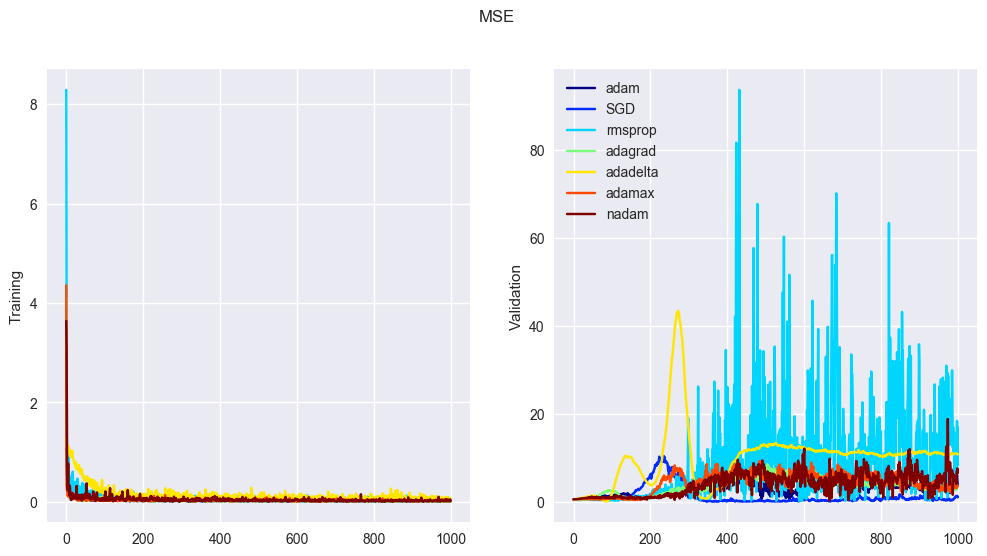

In [151]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization,Input,Lambda
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()
seed = 10
np.random.seed(seed)
n=200
X=np.array([i for i in range(n)],dtype=np.float32).reshape(200,1)
#Y=np.array([1 if i%2!=0 else 0 for i in X])
Y=np.cos(X/10)
# fix random seed for reproducibility
n=256
depth=5
xmean=X.mean()
xstd=X.std()
def denseblock(model,i):
    model.add(Dense(i,activation='relu'))
    #model.add(Dropout(0.1))
    model.add(BatchNormalization())
def normalise(x):
    return (x-xmean)/xstd
def get_model():
    model = Sequential()
    model.add(Lambda(normalise,input_shape=(1,)))
    #model.layers[0].set_weights([np.array([[1]]),np.array([1])])
    for i in range(depth):
        denseblock(model,n)
    model.add(Dense(1))
    return model
# Compile model
optimizers=['adam','SGD','rmsprop','adagrad','adadelta','adamax','nadam']
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
def fit(mo,opti):
    mo.compile(loss='mse', optimizer=opti, metrics=['accuracy'])    
    mo.optimizer.lr=1e-3
    history=mo.fit(X, Y, nb_epoch=1000,validation_split=0.2,shuffle=True, batch_size=64,  verbose=0)
    print([i for i in mo.layers[0].get_weights()])
    return history
cm=plt.get_cmap('jet',7)
def plots(hists):
    plt.figure(figsize=(12,6))
    for i,history in enumerate(hists):
        plt.subplot(1,2,1)
        plt.plot(history.history['loss'],c=cm(i))
        plt.subplot(1,2,2)
        plt.plot(history.history['val_loss'],label=optimizers[i],c=cm(i))
        plt.legend()

    plt.subplot(1,2,1)
    plt.suptitle('MSE')
    plt.ylabel('Training')
    plt.subplot(1,2,2)
    plt.ylabel('Validation')

    plt.legend()
    plt.show()
models=[get_model() for i in range(7)]
hi=[fit(models[i],optimizers[i]) for i in range(7)]
plots(hi)


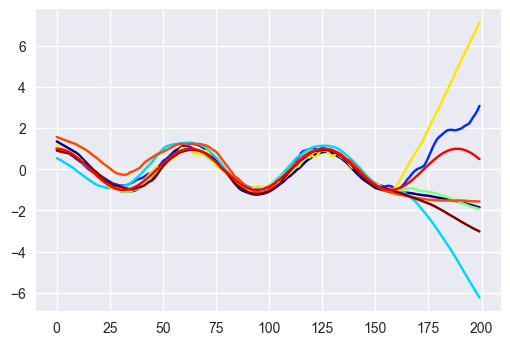

In [152]:
for i,m in enumerate(models):
    plt.plot(X,m.predict(X),c=cm(i))
plt.plot(X,Y,c='r')